pip install pandas geopy pycountry

In [1]:
pip install pycountry

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import pycountry
from geopy.geocoders import Nominatim
from time import sleep

In [3]:
df_global = pd.read_csv("WDPA_WDOECM_Apr2025_Public_all_csv.csv")

df_global

FileNotFoundError: [Errno 2] No such file or directory: 'WDPA_WDOECM_Apr2025_Public_all_csv.csv'

In [ ]:
df_global.sample(15) # filas aleatorias.

,TYPE,WDPAID,WDPA_PID,PA_DEF,NAME,ORIG_NAME,DESIG,DESIG_ENG,DESIG_TYPE,IUCN_CAT,...,METADATAID,SUB_LOC,PARENT_ISO3,ISO3,SUPP_INFO,CONS_OBJ,GIS_AREA_ORIGINAL,GIS_AREA_imputed,Latitude,Longitude
251364,Polygon,555702761,555702761,1,SK 83-2008,SK 83-2008,Naturvårdsavtal tecknade av Skogsstyrelsen,"Nature conservation agreement, Swedish Forest ...",National,IV,...,2013,Not Reported,SWE,SWE,Not Applicable,Not Applicable,0.096723,False,None,None
139206,Polygon,555519972,555519972,1,Bienitz und Moormergelgebiet,Bienitz und Moormergelgebiet,Special Areas of Conservation (Habitats Direct...,Special Areas of Conservation (Habitats Direct...,Regional,Not Reported,...,1832,Not Reported,DEU,DEU,Not Applicable,Not Applicable,2.990512,False,None,None
42495,Polygon,44441625,44441625,1,Roberts Bluff,Roberts Bluff,Access,Access,National,V,...,1848,US-MO,USA,USA,Not Applicable,Not Applicable,0.019787,False,None,None
7144,Polygon,555542566,555542566,1,Tapirapé/Karajá,Tapirapé/Karajá,Terra Indígena,Indigenous Area,National,Not Reported,...,905,BR-MT,BRA,BRA,Not Applicable,Not Applicable,102.354898,False,None,None
131621,Polygon,555580013,555580013,1,Viiankiaapa,Viiankiaapa,Special Protection Area (Birds Directive),Special Protection Area (Birds Directive),Regional,Not Reported,...,1832,Not Reported,FIN,FIN,Not Applicable,Not Applicable,65.949308,False,None,None
9708,Polygon,1284,1284,1,Dez,Dez,Wildlife Refuge,Wildlife Refuge,National,IV,...,506,IR-10,IRN,IRN,Not Applicable,Not Applicable,68.180897,False,None,None
4615,Polygon,555564186,555564186,1,"Melody Lane, Waikino","Melody Lane, Waikino",Stewardship Area,Stewardship Area,National,III,...,1773,NZ-WKO,NZL,NZL,Not Applicable,Not Applicable,0.001253,False,None,None
165030,Polygon,354158,354158,1,"Avon, Turton, and Dolodrook Rivers; Ben Cruach...","Avon, Turton, and Dolodrook Rivers; Ben Cruach...",Natural Catchment Area,Natural Catchment Area,National,Ib,...,1804,AU-VIC,AUS,AUS,Not Applicable,Not Applicable,392.305431,False,None,None
137242,Polygon,555518617,555518617,1,Rarangseen,Rarangseen,Special Areas of Conservation (Habitats Direct...,Special Areas of Conservation (Habitats Direct...,Regional,Not Reported,...,1832,Not Reported,DEU,DEU,Not Applicable,Not Applicable,0.678226,False,None,None
263474,Polygon,555730259,555730259,1,Kronan,Kronan,Natura 2000 SCI,Natura 2000 SCI,National,IV,...,2013,Not Reported,SWE,SWE,Not Applicable,Not Applicable,0.091102,False,None,None


``Fase 1:Exploración y Limpieza``

  Analizo a fondo.
 Información general, valoración de nulos, valores únicos, estadísticas.

In [ ]:
df_global.shape #  filas y columnas. Tamaño.

(311675, 35)

In [ ]:
# información general del DataFrame, incluyendo tipos de datos y valores nulos. 

df_global.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311675 entries, 0 to 311674
Data columns (total 35 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   TYPE               311675 non-null  object 
 1   WDPAID             311675 non-null  int64  
 2   WDPA_PID           311675 non-null  object 
 3   PA_DEF             311675 non-null  int64  
 4   NAME               311675 non-null  object 
 5   ORIG_NAME          311675 non-null  object 
 6   DESIG              311675 non-null  object 
 7   DESIG_ENG          311675 non-null  object 
 8   DESIG_TYPE         311675 non-null  object 
 9   IUCN_CAT           311675 non-null  object 
 10  INT_CRIT           311675 non-null  object 
 11  MARINE             311675 non-null  int64  
 12  REP_M_AREA         311675 non-null  float64
 13  GIS_M_AREA         299596 non-null  float64
 14  REP_AREA           311675 non-null  float64
 15  GIS_AREA           311578 non-null  float64
 16  NO

In [ ]:
# valores nulos en cada columna a partir del método 

df_global.isnull().sum()

TYPE                      0
WDPAID                    0
WDPA_PID                  0
PA_DEF                    0
NAME                      0
ORIG_NAME                 0
DESIG                     0
DESIG_ENG                 0
DESIG_TYPE                0
IUCN_CAT                  0
INT_CRIT                  0
MARINE                    0
REP_M_AREA                0
GIS_M_AREA            12079
REP_AREA                  0
GIS_AREA                 97
NO_TAKE                1635
NO_TK_AREA                0
STATUS                    0
STATUS_YR                 0
GOV_TYPE                  0
OWN_TYPE                  0
MANG_AUTH                 0
MANG_PLAN                27
VERIF                     0
METADATAID                0
SUB_LOC                   3
PARENT_ISO3               0
ISO3                      0
SUPP_INFO                 0
CONS_OBJ                  0
GIS_AREA_ORIGINAL     12079
GIS_AREA_imputed          0
Latitude             311675
Longitude            311675
dtype: int64

In [ ]:
# valores nulos hay por columna y muestro las columnas que tienen al menos un valor nulo
nulos_por_columna = df_global.isnull().sum()

columnas_con_nulos = nulos_por_columna[nulos_por_columna > 0]

columnas_con_nulos

GIS_M_AREA            12079
GIS_AREA                 97
NO_TAKE                1635
MANG_PLAN                27
SUB_LOC                   3
GIS_AREA_ORIGINAL     12079
Latitude             311675
Longitude            311675
dtype: int64

Explicación:
df.isnull().sum() te da el número de valores nulos por cada columna.

nulos_por_columna[nulos_por_columna > 0] filtra las columnas que tienen al menos un valor nulo.

Al final, columnas_con_nulos te mostrará solo aquellas columnas que contienen valores nulos, junto con el número de valores nulos en cada una.

In [ ]:
# cantidad de valores únicos por columna, devuelve el número de valores únicos en una columna o df, es decir, 
#la cantidad de valores diferentes sin contar los repetidos.

df_global.nunique()

TYPE                      2
WDPAID               309774
WDPA_PID             311675
PA_DEF                    2
NAME                 281651
ORIG_NAME            281549
DESIG                 10188
DESIG_ENG              1819
DESIG_TYPE                4
IUCN_CAT                 10
INT_CRIT                233
MARINE                    3
REP_M_AREA             7907
GIS_M_AREA            26829
REP_AREA             197011
GIS_AREA             296389
NO_TAKE                   5
NO_TK_AREA              848
STATUS                    6
STATUS_YR               166
GOV_TYPE                 12
OWN_TYPE                 10
MANG_AUTH              4298
MANG_PLAN              3609
VERIF                     3
METADATAID              391
SUB_LOC                2957
PARENT_ISO3             224
ISO3                    270
SUPP_INFO               171
CONS_OBJ                  5
GIS_AREA_ORIGINAL    296310
GIS_AREA_imputed          2
Latitude                  0
Longitude                 0
dtype: int64

In [ ]:
# estadísticas de los datos.
                        
df_global.describe().T

,count,mean,std,min,25%,50%,75%,max
WDPAID,311675.0,3.365946e+08,2.704066e+08,1.000000e+00,328344.500000,5.555547e+08,5.556728e+08,5.557903e+08
PA_DEF,311675.0,9.792123e-01,1.426731e-01,0.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00
MARINE,311675.0,7.655731e-02,3.371512e-01,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,2.000000e+00
REP_M_AREA,311675.0,8.891989e+01,7.528049e+03,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.968938e+06
GIS_M_AREA,299596.0,1.296357e+02,9.434039e+03,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.969116e+06
REP_AREA,311675.0,3.033423e+02,4.113849e+04,0.000000e+00,0.036500,2.701759e-01,2.810800e+00,2.228425e+07
GIS_AREA,311578.0,2.333815e+02,1.004832e+04,5.592145e-09,0.047276,3.424299e-01,3.867074e+00,1.969117e+06
NO_TK_AREA,311675.0,3.016110e+01,4.044783e+03,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.555851e+06
STATUS_YR,311675.0,1.770457e+03,6.386060e+02,0.000000e+00,1985.000000,2.003000e+03,2.012000e+03,2.024000e+03
METADATAID,311675.0,1.876600e+03,2.952188e+02,0.000000e+00,1848.000000,1.970000e+03,2.013000e+03,2.116000e+03


In [ ]:
# Ver los duplicados

df_global.duplicated().sum() 

0

In [ ]:
# variable para mostrar cuales son los duplicados al printear

duplicated = df_global[df_global.duplicated()]

duplicated

,TYPE,WDPAID,WDPA_PID,PA_DEF,NAME,ORIG_NAME,DESIG,DESIG_ENG,DESIG_TYPE,IUCN_CAT,...,METADATAID,SUB_LOC,PARENT_ISO3,ISO3,SUPP_INFO,CONS_OBJ,GIS_AREA_ORIGINAL,GIS_AREA_imputed,Latitude,Longitude


ahora vamos a abrir el otro csv

In [ ]:
df_sources = pd.read_csv("WDPA_sources_Apr2025.csv")

df_sources

,metadataid,data_title,resp_party,year,update_yr,char_set,ref_system,scale,lineage,citation,disclaimer,language,verifier
0,621,Protected Areas of St Helena,St Helena Government,2003,2024,Not Reported,Not Reported,Not Reported,Not Reported,Not Reported,This data is restricted for visualisation and ...,English,St Helena Government
1,6,Protected areas of Benin,Insititut National de l'Information géographiq...,1984,1984,Not Reported,Not Reported,"1:600,000",Protected areas for Benin are taken from a 1:6...,,Not Reported,French,Insititut National de l'Information géographiq...
2,10,Protected Areas of Belarus,"Department of Environment and Protection, Belarus",1996,1996,Not Reported,"Transverse Mercator Central Meridian, False E,...","1:500,000",Map produced for the Department of Environment...,,Not Reported,English,"Department of Environment and Protection, Belarus"
3,13,Protected Areas of Bermuda,"Government of Bermuda, Department of Environme...",1990,2024,Not Reported,"Bermuda_2000_National_Grid, D_Bermuda_2000, Tr...","1:5,000",Review prior to submission,"Government of Bermuda, Department of Environme...",The Government of Bermuda makes no claim regar...,English,"Government of Bermuda, Department of Environme..."
4,72,Protected areas of Gabon,"Insititut Géographique National - Paris, France",1993,1993,Not Reported,Not Reported,"1:1,000,000",No data have been made available for the Fores...,,Not Reported,Not Reported,"Insititut Géographique National - Paris, France"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,2109,National Natural Monument of Japan,"Ministry of Education, Culture, Sports, Scienc...",2023,2024,UTF-8,WGS84,Not Reported,Not Reported,Not Reported,Not Reported,English and Japanese,"Ministry of the Environment, Government of Japan"
388,2110,Protected areas designated by prefectural ordi...,Prefectural Governments of Japan,2023,2024,UTF-8,WGS84,Not Reported,Not Reported,Not Reported,Not Reported,English and Japanese,"Ministry of the Environment, Government of Japan"
389,2105,Protected Areas of Pakistan,"Ministry of Climate Change, & Environmental Co...",2024,2024,Not Reported,WGS84,Not Reported,Not Reported,Not Reported,Not Reported,English,"Ministry of Climate Change, & Environmental Co..."
390,2114,Protected areas of Yemen,Environmental Protection Agency,2024,2024,Not Reported,WGS84,Not Reported,Not Reported,Not Reported,Not Reported,English,Environmental Protection Agency


AL SER UNA DATASET TAN AMPLIO (TODO EL MUNDO) NOS VAMOS A CENTRAR EN LOS PAISES DE AMERICA DEL SUR. VAMOS A FILTRAR POR LA COLUMNA ISO3, QUE NOS DICE CODIGO DE CADA PAIS.

Códigos ISO3 de los países de América del Sur:
Argentina: ARG

Bolivia: BOL

Brasil: BRA

Chile: CHL

Colombia: COL

Ecuador: ECU

Guyana: GUY

Paraguay: PRY

Perú: PER

Surinam: SUR

Uruguay: URY

Venezuela: VEN

In [ ]:
# Lista de países de América del Sur (códigos ISO3)
south_america = ['ARG', 'BOL', 'BRA', 'CHL', 'COL', 'ECU', 'GUY', 'PRY', 'PER', 'SUR', 'URY', 'VEN']


In [ ]:
# Filtrar el DataFrame para solo incluir las filas donde el país está en América del Sur
df_south_america = df[df['ISO3'].isin(south_america)]


In [ ]:
# Mostrar las primeras filas del DataFrame filtrado para verificar
df_south_america.head()

,TYPE,WDPAID,WDPA_PID,PA_DEF,NAME,ORIG_NAME,DESIG,DESIG_ENG,DESIG_TYPE,IUCN_CAT,...,METADATAID,SUB_LOC,PARENT_ISO3,ISO3,SUPP_INFO,CONS_OBJ,GIS_AREA_ORIGINAL,GIS_AREA_imputed,Latitude,Longitude
79,Polygon,555698070,555698070,1,Sitio Histórico e Patrimonio Cultural Kalunga,Sitio Histórico e Patrimonio Cultural Kalunga,Sitio Histórico e Patrimônio Cultural,Historical and Cultural Heritage Site,Not Applicable,VI,...,2001,Not Reported,BRA,BRA,Not Applicable,Not Applicable,2816.320433,False,None,None
80,Polygon,555721646,555721646,1,Iña Wampisti Nunke,Gobierno Territorio Autónomo de la Nación Wampis,Iña Wampisti Nunke,Wampis Territory (non-state protected area),Not Applicable,VI,...,2024,Not Reported,PER,PER,Not Applicable,Not Applicable,13452.000000,False,None,None
94,Polygon,555697588,555697588,1,Pueblo Originario Kichwa de Sarayaku,Pueblo Originario Kichwa de Sarayaku,Kawsak Sacha – Selva Viviente,Living Forest of Sarayaku,Not Applicable,Not Assigned,...,1977,Not Reported,ECU,ECU,Not Applicable,Not Applicable,1426.260254,False,None,None
95,Polygon,555645497,555645497,1,Territorio del Pueblo Shuar Arutam,Territorio del Pueblo Shuar Arutam,Kawsak Sacha – Selva Viviente,Living Forest of Sarayaku (Non-state protected...,Not Applicable,Not Assigned,...,2026,Not Reported,ECU,ECU,Not Applicable,Not Applicable,2321.661170,False,None,None
510,Polygon,555592599,555592599,1,Palmera de Sao,Palmera de Sao,Área Protegida Municipal,Municipal Protected Area,National,Not Reported,...,1860,BO-S,BOL,BOL,Not Applicable,Not Applicable,7.582885,False,None,None


In [ ]:
df_south_america

,TYPE,WDPAID,WDPA_PID,PA_DEF,NAME,ORIG_NAME,DESIG,DESIG_ENG,DESIG_TYPE,IUCN_CAT,...,METADATAID,SUB_LOC,PARENT_ISO3,ISO3,SUPP_INFO,CONS_OBJ,GIS_AREA_ORIGINAL,GIS_AREA_imputed,Latitude,Longitude
79,Polygon,555698070,555698070,1,Sitio Histórico e Patrimonio Cultural Kalunga,Sitio Histórico e Patrimonio Cultural Kalunga,Sitio Histórico e Patrimônio Cultural,Historical and Cultural Heritage Site,Not Applicable,VI,...,2001,Not Reported,BRA,BRA,Not Applicable,Not Applicable,2816.320433,False,None,None
80,Polygon,555721646,555721646,1,Iña Wampisti Nunke,Gobierno Territorio Autónomo de la Nación Wampis,Iña Wampisti Nunke,Wampis Territory (non-state protected area),Not Applicable,VI,...,2024,Not Reported,PER,PER,Not Applicable,Not Applicable,13452.000000,False,None,None
94,Polygon,555697588,555697588,1,Pueblo Originario Kichwa de Sarayaku,Pueblo Originario Kichwa de Sarayaku,Kawsak Sacha – Selva Viviente,Living Forest of Sarayaku,Not Applicable,Not Assigned,...,1977,Not Reported,ECU,ECU,Not Applicable,Not Applicable,1426.260254,False,None,None
95,Polygon,555645497,555645497,1,Territorio del Pueblo Shuar Arutam,Territorio del Pueblo Shuar Arutam,Kawsak Sacha – Selva Viviente,Living Forest of Sarayaku (Non-state protected...,Not Applicable,Not Assigned,...,2026,Not Reported,ECU,ECU,Not Applicable,Not Applicable,2321.661170,False,None,None
510,Polygon,555592599,555592599,1,Palmera de Sao,Palmera de Sao,Área Protegida Municipal,Municipal Protected Area,National,Not Reported,...,1860,BO-S,BOL,BOL,Not Applicable,Not Applicable,7.582885,False,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307290,Point,555682421,555682421,1,Parque Natural Municipal De Cachoeira Do Campo,Parque Natural Municipal De Cachoeira Do Campo,Parque,Park,National,II,...,1802,BRA-MG,BRA,BRA,Not Applicable,Not Applicable,NaN,True,None,None
307291,Point,555758905,555758905,1,Área De Proteção Ambiental Do Carmo,Área De Proteção Ambiental Do Carmo,Área de Proteção Ambiental,Environmental Protection Area,National,V,...,1802,BRA-AP,BRA,BRA,Not Applicable,Not Applicable,NaN,True,None,None
307292,Point,555682448,555682448,1,Parque Estadual De Espigão Alto,Parque Estadual De Espigão Alto,Parque,Park,National,II,...,1802,BRA-RS,BRA,BRA,Not Applicable,Not Applicable,NaN,True,None,None
307293,Point,555682427,555682427,1,Área De Proteção Ambiental Rota Do Sol,Área De Proteção Ambiental Rota Do Sol,Área de Proteção Ambiental,Environmental Protection Area,National,V,...,1802,BRA-RS,BRA,BRA,Not Applicable,Not Applicable,NaN,True,None,None


In [ ]:
df_south_america.shape

(7293, 35)

In [ ]:
# información general del DataFrame, incluyendo tipos de datos y valores nulos. 

df_south_america.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 7293 entries, 79 to 307294
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TYPE               7293 non-null   object 
 1   WDPAID             7293 non-null   int64  
 2   WDPA_PID           7293 non-null   object 
 3   PA_DEF             7293 non-null   int64  
 4   NAME               7293 non-null   object 
 5   ORIG_NAME          7293 non-null   object 
 6   DESIG              7293 non-null   object 
 7   DESIG_ENG          7293 non-null   object 
 8   DESIG_TYPE         7293 non-null   object 
 9   IUCN_CAT           7293 non-null   object 
 10  INT_CRIT           7293 non-null   object 
 11  MARINE             7293 non-null   int64  
 12  REP_M_AREA         7293 non-null   float64
 13  GIS_M_AREA         6872 non-null   float64
 14  REP_AREA           7293 non-null   float64
 15  GIS_AREA           7293 non-null   float64
 16  NO_TAKE            7291 no

In [ ]:
# valores nulos en cada columna a partir del método 

df_south_america.isnull().sum()

TYPE                    0
WDPAID                  0
WDPA_PID                0
PA_DEF                  0
NAME                    0
ORIG_NAME               0
DESIG                   0
DESIG_ENG               0
DESIG_TYPE              0
IUCN_CAT                0
INT_CRIT                0
MARINE                  0
REP_M_AREA              0
GIS_M_AREA            421
REP_AREA                0
GIS_AREA                0
NO_TAKE                 2
NO_TK_AREA              0
STATUS                  0
STATUS_YR               0
GOV_TYPE                0
OWN_TYPE                0
MANG_AUTH               0
MANG_PLAN               0
VERIF                   0
METADATAID              0
SUB_LOC                 0
PARENT_ISO3             0
ISO3                    0
SUPP_INFO               0
CONS_OBJ                0
GIS_AREA_ORIGINAL     421
GIS_AREA_imputed        0
Latitude             7293
Longitude            7293
dtype: int64

In [ ]:
# valores nulos hay por columna y muestro las columnas que tienen al menos un valor nulo
nulos_columnas = df_south_america.isnull().sum()

nulos_columnas = nulos_por_columna[nulos_por_columna > 0]

nulos_columnas

GIS_M_AREA            12079
GIS_AREA                 97
NO_TAKE                1635
MANG_PLAN                27
SUB_LOC                   3
GIS_AREA_ORIGINAL     12079
Latitude             311675
Longitude            311675
dtype: int64

In [ ]:

df_south_america.nunique()

TYPE                    2
WDPAID               7281
WDPA_PID             7293
PA_DEF                  2
NAME                 6845
ORIG_NAME            6830
DESIG                 256
DESIG_ENG             236
DESIG_TYPE              4
IUCN_CAT               10
INT_CRIT               63
MARINE                  3
REP_M_AREA            385
GIS_M_AREA            724
REP_AREA             6705
GIS_AREA             6853
NO_TAKE                 4
NO_TK_AREA             38
STATUS                  4
STATUS_YR              97
GOV_TYPE               10
OWN_TYPE                8
MANG_AUTH             756
MANG_PLAN            1966
VERIF                   3
METADATAID             36
SUB_LOC               409
PARENT_ISO3            12
ISO3                   12
SUPP_INFO              48
CONS_OBJ                3
GIS_AREA_ORIGINAL    6851
GIS_AREA_imputed        2
Latitude                0
Longitude               0
dtype: int64

In [ ]:
# estadísticas de los datos.
                        
df_south_america.describe().T

,count,mean,std,min,25%,50%,75%,max
WDPAID,7293.0,3.891676e+08,2.545014e+08,3.000000,352411.000000,5.556001e+08,5.556829e+08,5.557903e+08
PA_DEF,7293.0,9.934183e-01,8.086552e-02,0.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00
MARINE,7293.0,7.678596e-02,3.392014e-01,0.000000,0.000000,0.000000e+00,0.000000e+00,2.000000e+00
REP_M_AREA,7293.0,4.838337e+02,1.133518e+04,0.000000,0.000000,0.000000e+00,0.000000e+00,5.793680e+05
GIS_M_AREA,6872.0,5.529311e+02,1.180558e+04,0.000000,0.000000,0.000000e+00,0.000000e+00,5.785321e+05
REP_AREA,7293.0,1.568513e+03,1.499108e+04,0.000000,0.311404,5.367777e+00,1.351233e+02,5.793680e+05
GIS_AREA,7293.0,1.301734e+03,1.222380e+04,0.000102,0.571596,9.670195e+00,1.292532e+02,5.785335e+05
NO_TK_AREA,7293.0,1.424893e+02,5.367541e+03,0.000000,0.000000,0.000000e+00,0.000000e+00,3.000350e+05
STATUS_YR,7293.0,1.993295e+03,1.487934e+02,0.000000,1997.000000,2.007000e+03,2.016000e+03,2.024000e+03
METADATAID,7293.0,1.733326e+03,3.007440e+02,358.000000,1802.000000,1.802000e+03,1.861000e+03,2.033000e+03


In [ ]:
# Ver los duplicados

df_south_america.duplicated().sum() 

0

``2 . Limpieza de Datos:``
. Limpieza. Tratamiento de nulos. Verificación consistencia y correción de datos. Cambio valores negativos. Cambio de type.

quiero ver de todo mi dataset que hacer con las columnas porque son 31 y son muchas

In [ ]:
#Verificar los tipos de datos de todas las columnas
df_south_america.dtypes

TYPE                  object
WDPAID                 int64
WDPA_PID              object
PA_DEF                 int64
NAME                  object
ORIG_NAME             object
DESIG                 object
DESIG_ENG             object
DESIG_TYPE            object
IUCN_CAT              object
INT_CRIT              object
MARINE                 int64
REP_M_AREA           float64
GIS_M_AREA           float64
REP_AREA             float64
GIS_AREA             float64
NO_TAKE               object
NO_TK_AREA           float64
STATUS                object
STATUS_YR              int64
GOV_TYPE              object
OWN_TYPE              object
MANG_AUTH             object
MANG_PLAN             object
VERIF                 object
METADATAID             int64
SUB_LOC               object
PARENT_ISO3           object
ISO3                  object
SUPP_INFO             object
CONS_OBJ              object
GIS_AREA_ORIGINAL    float64
GIS_AREA_imputed        bool
Latitude              object
Longitude     

In [ ]:
# Ver los valores únicos en la columna 'type'
df_south_america['TYPE'].unique()

array(['Polygon', 'Point'], dtype=object)

In [ ]:
# Mostrar otra vez cantidad de valores nulos antes de tratarlos.

df_south_america.isnull().sum()

TYPE                    0
WDPAID                  0
WDPA_PID                0
PA_DEF                  0
NAME                    0
ORIG_NAME               0
DESIG                   0
DESIG_ENG               0
DESIG_TYPE              0
IUCN_CAT                0
INT_CRIT                0
MARINE                  0
REP_M_AREA              0
GIS_M_AREA            421
REP_AREA                0
GIS_AREA                0
NO_TAKE                 2
NO_TK_AREA              0
STATUS                  0
STATUS_YR               0
GOV_TYPE                0
OWN_TYPE                0
MANG_AUTH               0
MANG_PLAN               0
VERIF                   0
METADATAID              0
SUB_LOC                 0
PARENT_ISO3             0
ISO3                    0
SUPP_INFO               0
CONS_OBJ                0
GIS_AREA_ORIGINAL     421
GIS_AREA_imputed        0
Latitude             7293
Longitude            7293
dtype: int64

In [ ]:
# valores nulos hay por columna y muestro las columnas que tienen al menos un valor nulo
nulos_columnas = df_south_america.isnull().sum()

nulos_columnas = nulos_por_columna[nulos_por_columna > 0]

nulos_columnas

GIS_M_AREA            12079
GIS_AREA                 97
NO_TAKE                1635
MANG_PLAN                27
SUB_LOC                   3
GIS_AREA_ORIGINAL     12079
Latitude             311675
Longitude            311675
dtype: int64

In [ ]:
# Decido hacer un porcentaje para ver que voy a hacer con los nulos.

porc = df_south_america['GIS_M_AREA'].isnull().mean() * 100

porc

5.772658713835185

In [ ]:
# Decido hacer un porcentaje para ver que voy a hacer con los nulos.

porc_1 = df_south_america['GIS_AREA'].isnull().mean() * 100

porc_1

0.0

In [ ]:
# Decido hacer un porcentaje para ver que voy a hacer con los nulos.

porc_2 = df_south_america['NO_TAKE'].isnull().mean() * 100

porc_2

0.02742355683532154

In [ ]:
# Decido hacer un porcentaje para ver que voy a hacer con los nulos.

porc_3 = df_south_america['MANG_PLAN'].isnull().mean() * 100

porc_3

0.0

In [ ]:
# Decido hacer un porcentaje para ver que voy a hacer con tantos nulos.

porc_4 = df_south_america['SUB_LOC'].isnull().mean() * 100

porc_4

0.0

In [ ]:
# Filtrar las columnas que te interesan
columns_to_check = ['GIS_M_AREA', 'GIS_AREA', 'NO_TAKE', 'MANG_PLAN', 'SUB_LOC']
df_filtered = df_south_america[columns_to_check]

# Ver los tipos de datos de estas columnas
df_filtered.dtypes

GIS_M_AREA    float64
GIS_AREA      float64
NO_TAKE        object
MANG_PLAN      object
SUB_LOC        object
dtype: object

In [ ]:
df_filtered["GIS_M_AREA"]

79        0.0
80        0.0
94        0.0
95        0.0
510       0.0
         ... 
307290    NaN
307291    NaN
307292    NaN
307293    NaN
307294    NaN
Name: GIS_M_AREA, Length: 7293, dtype: float64

In [ ]:
df_filtered["GIS_AREA"]

79         2816.320433
80        13452.000000
94         1426.260254
95         2321.661170
510           7.582885
              ...     
307290        9.670195
307291        9.670195
307292        9.670195
307293        9.670195
307294        9.670195
Name: GIS_AREA, Length: 7293, dtype: float64

In [ ]:
df_filtered['NO_TAKE']

79        Not Applicable
80        Not Applicable
94        Not Applicable
95        Not Applicable
510       Not Applicable
               ...      
307290    Not Applicable
307291    Not Applicable
307292    Not Applicable
307293    Not Applicable
307294    Not Applicable
Name: NO_TAKE, Length: 7293, dtype: object

estas son las columnas con nulos: 'GIS_M_AREA', 'GIS_AREA', 'NO_TAKE', 'MANG_PLAN', 'SUB_LOC'. Solo voy a tratar GIS_AREA Y NO_TAKE, porque el resto no las voy a usar en mi nuevo dataframe

Aquí te va una recomendación concreta basada en ese nivel de nulos:

🔸 Si los datos son confiables y el área debe existir:

👉 Rellena con la mediana (menos afectada por valores extremos):

In [ ]:
# Creo una columna con el valor original de 'GIS_AREA'
df_south_america.loc[:, 'GIS_AREA_ORIGINAL'] = df_south_america['GIS_AREA']

# Imputo valores nulos en la columna 'GIS_AREA' usando la mediana de cada grupo 'ISO3'
df_south_america.loc[:, 'GIS_AREA'] = df_south_america.groupby('ISO3')['GIS_AREA'].transform(
    lambda x: x.fillna(x.median()))

# Crear la bandera para marcar los valores imputados
df_south_america['GIS_AREA_imputed'] = df_south_america['GIS_AREA_ORIGINAL'].isnull()

# Verificar el resultado
df_south_america[['GIS_AREA', 'GIS_AREA_imputed', 'TYPE']].head()

C:\Users\JER\AppData\Local\Temp\ipykernel_12104\1053743770.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_south_america['GIS_AREA_imputed'] = df_south_america['GIS_AREA_ORIGINAL'].isnull()


,GIS_AREA,GIS_AREA_imputed,TYPE
79,2816.320433,False,Polygon
80,13452.000000,False,Polygon
94,1426.260254,False,Polygon
95,2321.661170,False,Polygon
510,7.582885,False,Polygon


In [ ]:
# Decido hacer que voy a hacer con nulos de no take.
df_south_america.loc[:, "NO_TAKE"] = df_south_america["NO_TAKE"].fillna("Unknown")
df_south_america.loc[:, "NO_TAKE"] = df_south_america["NO_TAKE"].replace({'Not Applicable': 'Unknown','Not Reported': 'Unknown'})
df_south_america["NO_TAKE"].unique()

array(['Unknown', 'Part', 'All'], dtype=object)

COMPRUEBO TODOS LOS NULOS

In [ ]:
df_south_america.isnull().sum()

TYPE                    0
WDPAID                  0
WDPA_PID                0
PA_DEF                  0
NAME                    0
ORIG_NAME               0
DESIG                   0
DESIG_ENG               0
DESIG_TYPE              0
IUCN_CAT                0
INT_CRIT                0
MARINE                  0
REP_M_AREA              0
GIS_M_AREA            421
REP_AREA                0
GIS_AREA                0
NO_TAKE                 0
NO_TK_AREA              0
STATUS                  0
STATUS_YR               0
GOV_TYPE                0
OWN_TYPE                0
MANG_AUTH               0
MANG_PLAN               0
VERIF                   0
METADATAID              0
SUB_LOC                 0
PARENT_ISO3             0
ISO3                    0
SUPP_INFO               0
CONS_OBJ                0
GIS_AREA_ORIGINAL       0
GIS_AREA_imputed        0
Latitude             7293
Longitude            7293
dtype: int64

In [ ]:
df_south_america['GIS_AREA_imputed'].unique

<bound method Series.unique of 79        False
80        False
94        False
95        False
510       False
          ...  
307290    False
307291    False
307292    False
307293    False
307294    False
Name: GIS_AREA_imputed, Length: 7293, dtype: bool>

``Elección columnas``

NOS QUEDAMOS con solo estas columnas, son especialmente relevantes para un análisis espacial y de conservación porque concentran la información clave sobre las características, estatus, y contexto de las áreas protegidas

In [ ]:
# Lista de columnas
columnas_a_conservar = ['TYPE', 'WDPAID', 'NAME', 'IUCN_CAT', 'MARINE', 
                        'REP_AREA', 'GIS_AREA', 'GIS_AREA_imputed', 'NO_TAKE', 'STATUS', 
                        'STATUS_YR', 'ISO3', 'GOV_TYPE']

In [ ]:
# Filtrar el DataFrame para mantener solo las columnas deseadas
df_south_america= df_south_america[columnas_a_conservar]

# Ver las primeras filas del DataFrame filtrado
df_south_america.head()

,TYPE,WDPAID,NAME,IUCN_CAT,MARINE,REP_AREA,GIS_AREA,GIS_AREA_imputed,NO_TAKE,STATUS,STATUS_YR,ISO3,GOV_TYPE
79,Polygon,555698070,Sitio Histórico e Patrimonio Cultural Kalunga,VI,0,2619.999000,2816.320433,False,Unknown,Established,0,BRA,Local communities
80,Polygon,555721646,Iña Wampisti Nunke,VI,0,13277.000000,13452.000000,False,Unknown,Established,0,PER,Indigenous peoples
94,Polygon,555697588,Pueblo Originario Kichwa de Sarayaku,Not Assigned,0,1427.514043,1426.260254,False,Unknown,Established,0,ECU,Indigenous peoples
95,Polygon,555645497,Territorio del Pueblo Shuar Arutam,Not Assigned,0,2325.336000,2321.661170,False,Unknown,Established,0,ECU,Indigenous peoples
510,Polygon,555592599,Palmera de Sao,Not Reported,0,7.576763,7.582885,False,Unknown,Designated,2006,BOL,Sub-national ministry or agency


In [ ]:
df_south_america.columns

Index(['TYPE', 'WDPAID', 'NAME', 'IUCN_CAT', 'MARINE', 'REP_AREA', 'GIS_AREA',
       'GIS_AREA_imputed', 'NO_TAKE', 'STATUS', 'STATUS_YR', 'ISO3',
       'GOV_TYPE'],
      dtype='object')

In [ ]:
df_south_america.isnull().sum()

TYPE                0
WDPAID              0
NAME                0
IUCN_CAT            0
MARINE              0
REP_AREA            0
GIS_AREA            0
GIS_AREA_imputed    0
NO_TAKE             0
STATUS              0
STATUS_YR           0
ISO3                0
GOV_TYPE            0
dtype: int64

In [ ]:
df_south_america.to_csv("datos_exportados.csv", index=False, encoding="utf-8")

Comenzamos a generar gráficas

1. Evolución de la protección ambiental.

Pregunta: ¿Cómo ha cambiado la cantidad de áreas protegidas en los últimos años en América del Sur?

Columnas clave:
STATUS_YR (Año en el que se estableció el estado de la zona protegida)
TYPE (Tipo de área protegida)


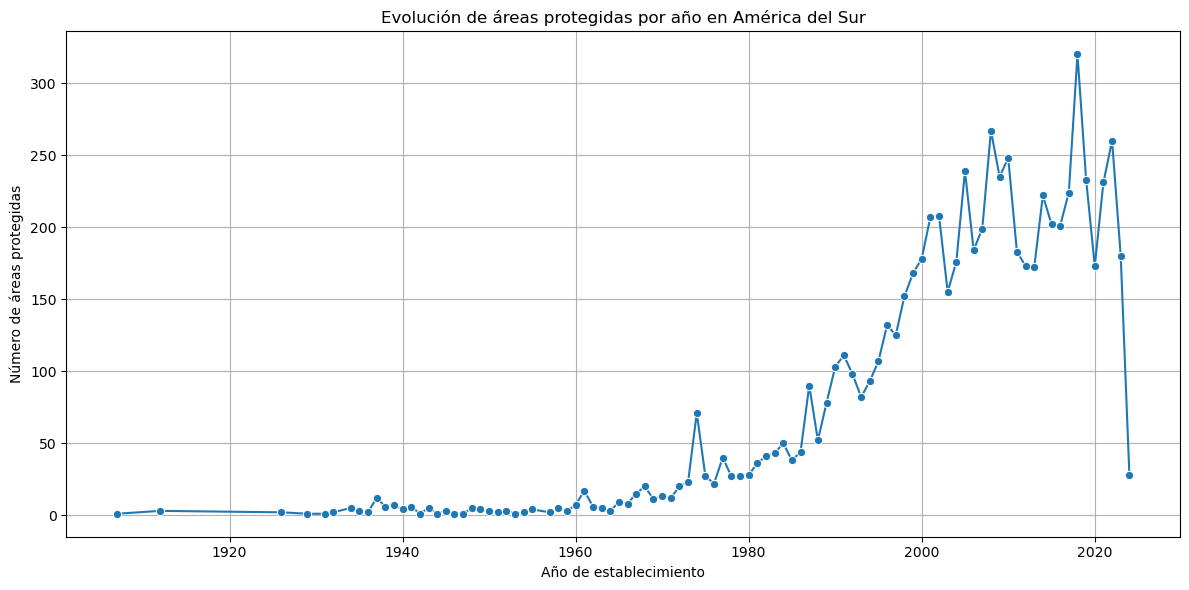

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df_south_america = df_south_america[
    (df_south_america['STATUS_YR'].notna()) & 
    (df_south_america['STATUS_YR'] >= 1900)
]

# Agrupamos y contamos por año
areas_por_año = df_south_america.groupby('STATUS_YR').size().reset_index(name='num_areas')

# Visualización
plt.figure(figsize=(12,6))
sns.lineplot(data=areas_por_año, x='STATUS_YR', y='num_areas', marker='o')
plt.title('Evolución de áreas protegidas por año en América del Sur')
plt.xlabel('Año de establecimiento')
plt.ylabel('Número de áreas protegidas')
plt.grid(True)
plt.tight_layout()
plt.show()


✅ Conclusión sobre la evolución de áreas protegidas en América del Sur
La gráfica muestra claramente cómo ha evolucionado el establecimiento de áreas protegidas en América del Sur durante el último siglo:

1900–1960:
Se observa una creación muy limitada de áreas protegidas, con pocos casos por año. Esto indica una etapa inicial, donde la conservación ambiental aún no tenía prioridad en la agenda política.

1960–1980:
Comienza un aumento gradual en la creación de áreas. Posiblemente asociado a los primeros tratados internacionales y mayor conciencia sobre la conservación de la biodiversidad.

1980–2010:
Esta etapa presenta un crecimiento explosivo. Muchos años superan las 100 nuevas áreas protegidas, y se alcanzan picos de más de 300 (como en 2019). Esto refleja políticas activas, mayor financiación y compromisos internacionales.

Después de 2020:
Hay una caída abrupta. Es probable que se deba a datos incompletos de los últimos años, o bien a impactos de la pandemia y otros factores socioeconómicos.


América del Sur ha intensificado enormemente sus esfuerzos de conservación en las últimas décadas, mostrando una transformación significativa en su compromiso ambiental.

2. Biodiversidad

Pregunta: ¿Qué países tienen áreas protegidas más diversas en términos de ecosistemas?

Columnas clave:
ISO3 (Código del país)
IUCN_CAT (Categoría IUCN de la zona protegida)
TYPE (Tipo de área protegida)



In [ ]:
diversidad_tipo = df_south_america.groupby('ISO3')['TYPE'].nunique().sort_values(ascending=False)

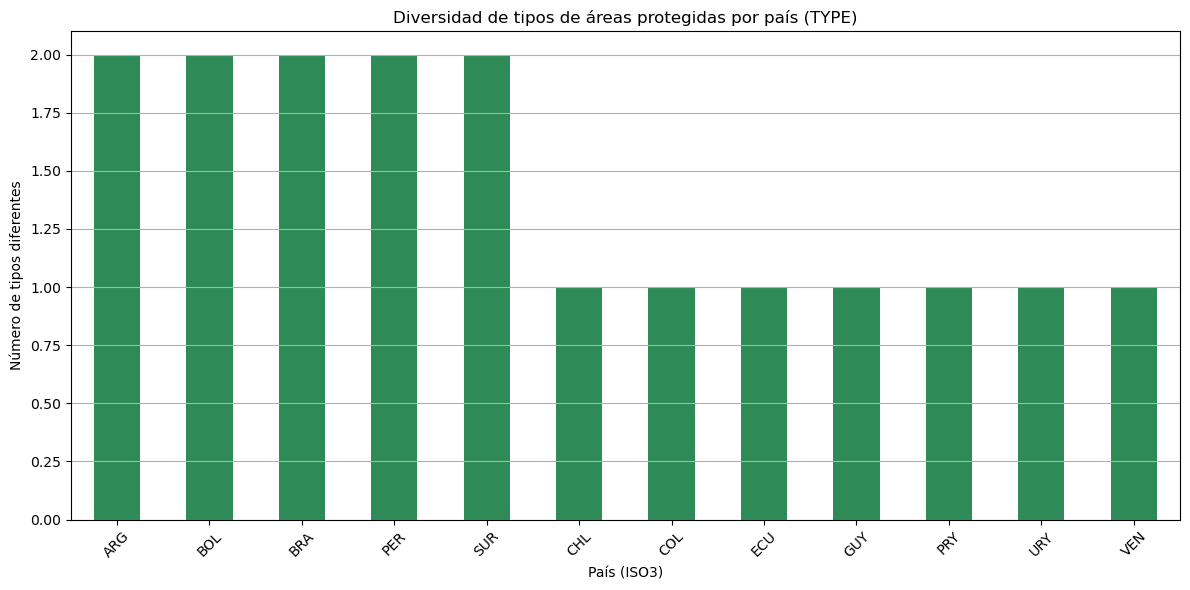

In [ ]:
plt.figure(figsize=(12,6))
diversidad_tipo.plot(kind='bar', color='seagreen')
plt.title('Diversidad de tipos de áreas protegidas por país (TYPE)')
plt.ylabel('Número de tipos diferentes')
plt.xlabel('País (ISO3)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


3. Distribución de áreas protegidas por estado y tipo de gobierno

Columnas clave: GOV_TYPE

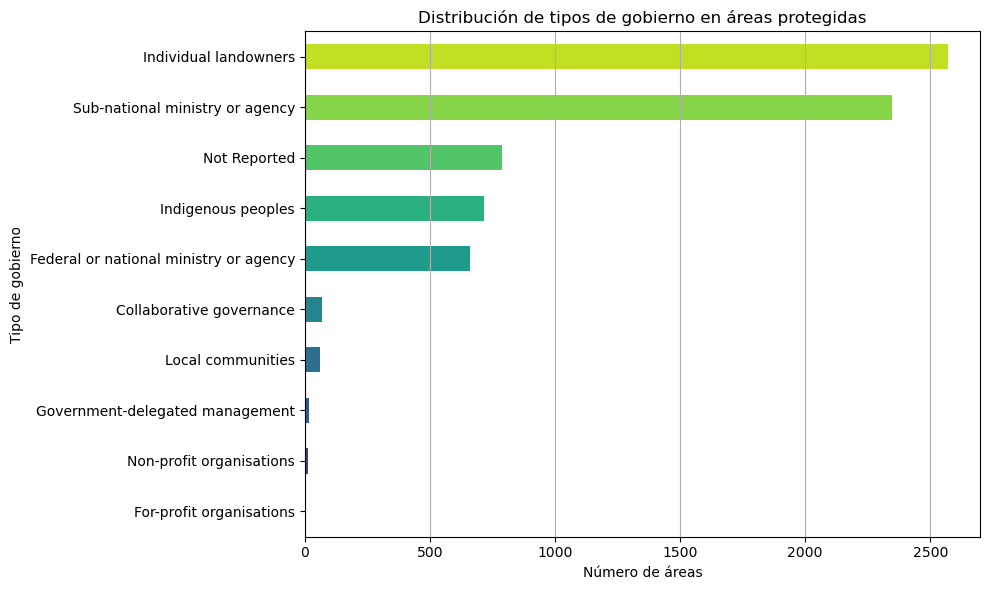

In [ ]:
# Conteo por tipo de gobierno
gobierno_total = df_south_america['GOV_TYPE'].value_counts()

# Obtener colores estilo 'viridis'
colores = sns.color_palette("viridis", len(gobierno_total))

# Gráfico de barras horizontal
plt.figure(figsize=(10, 6))
gobierno_total.sort_values().plot(kind='barh', color=colores)
plt.title('Distribución de tipos de gobierno en áreas protegidas')
plt.xlabel('Número de áreas')
plt.ylabel('Tipo de gobierno')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

La gráfica de barras horizontal muestra la distribución de los tipos de gobierno presentes en las áreas protegidas de Sudamérica. A través de la visualización, es posible observar cómo se distribuyen las áreas según el tipo de gobierno encargado de su administración.

El gráfico puede revelar patrones importantes, como la predominancia de ciertos tipos de gobierno en las áreas protegidas, lo que puede tener implicaciones para la conservación y gestión de estas áreas. 

4. Pregunta: ¿Qué países tienen más parques nacionales?


Columnas clave:
ISO3 (Código del país)
TYPE (Tipo de área protegida)



C:\Users\JER\AppData\Local\Temp\ipykernel_12104\2688554288.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=poligonos_por_pais.index, y=poligonos_por_pais.values, palette='viridis')


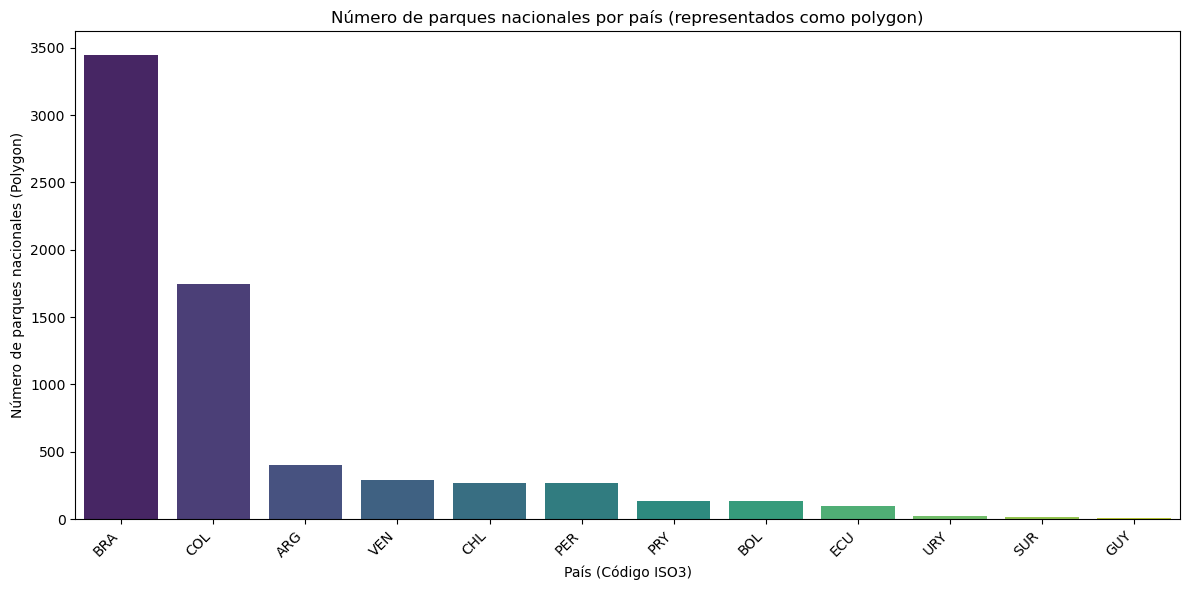

In [ ]:

# Filtrar los datos para incluir solo las filas donde el tipo es "Polygon" (áreas, parques nacionales, etc.)
poligonos = df_south_america[df_south_america['TYPE'] == 'Polygon']

# Contar cuántos polígonos hay por cada país (ISO3)
poligonos_por_pais = poligonos['ISO3'].value_counts()

# Crear un gráfico de barras para mostrar el número de polígonos (parques nacionales) por país
plt.figure(figsize=(12, 6))
sns.barplot(x=poligonos_por_pais.index, y=poligonos_por_pais.values, palette='viridis')

# Agregar títulos y etiquetas
plt.title('Número de parques nacionales por país (representados como polygon)')
plt.xlabel('País (Código ISO3)')
plt.ylabel('Número de parques nacionales (Polygon)')

# Mostrar el gráfico
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.show()

5. Distribución de áreas protegidas en América del Sur
Pregunta: ¿En qué países de América del Sur se encuentran las áreas protegidas más grandes?

Columnas clave:
ISO3 (Código del país)
GIS_AREA (Tamaño de la zona protegida)



C:\Users\JER\AppData\Local\Temp\ipykernel_12104\2051807827.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ISO3', y='GIS_AREA', data=area_por_pais, palette='viridis')


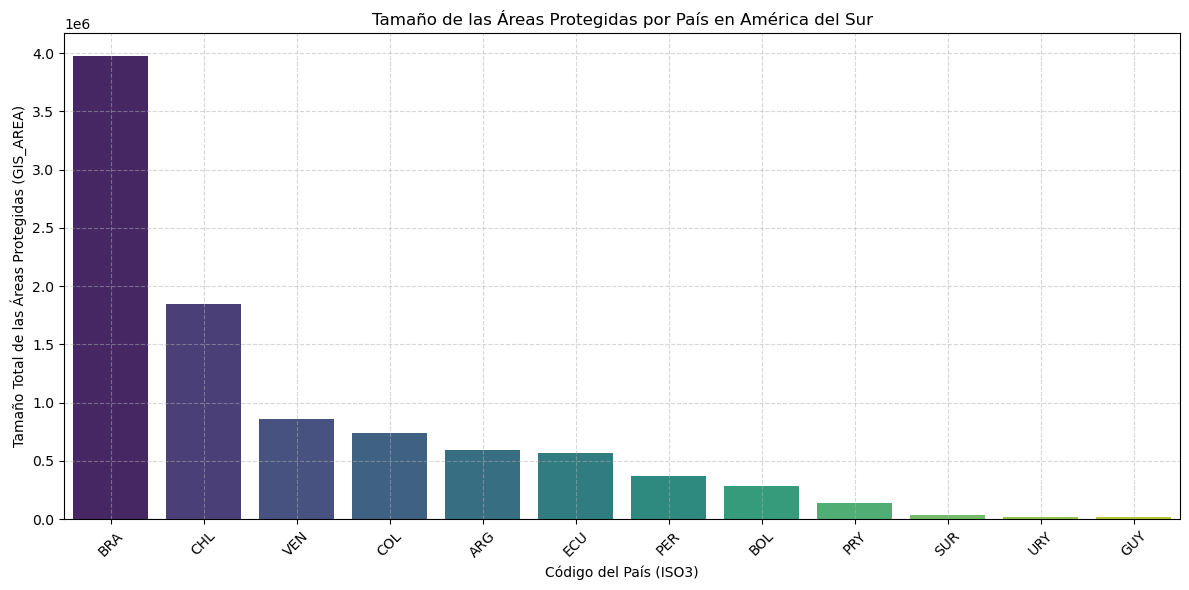

In [ ]:
# Agrupar por país y sumar el tamaño de las áreas protegidas
area_por_pais = df_south_america.groupby('ISO3')['GIS_AREA'].sum().reset_index()
# Ordenar por el tamaño de las áreas protegidas
area_por_pais = area_por_pais.sort_values(by='GIS_AREA', ascending=False)
# Crear gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='ISO3', y='GIS_AREA', data=area_por_pais, palette='viridis')
plt.title('Tamaño de las Áreas Protegidas por País en América del Sur')
plt.xlabel('Código del País (ISO3)')
plt.ylabel('Tamaño Total de las Áreas Protegidas (GIS_AREA)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show();

6. Áreas protegidas marinas y terrestres
Pregunta: ¿Cuántas áreas protegidas están en el mar y cuántas en tierra?

Columnas clave:
MARINE (Indica si el área es marina o terrestre, con valor 1 para marina y 0 para terrestre)


C:\Users\JER\AppData\Local\Temp\ipykernel_12104\1210530828.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=etiquetas, y=areas_tipo.values, palette='viridis')


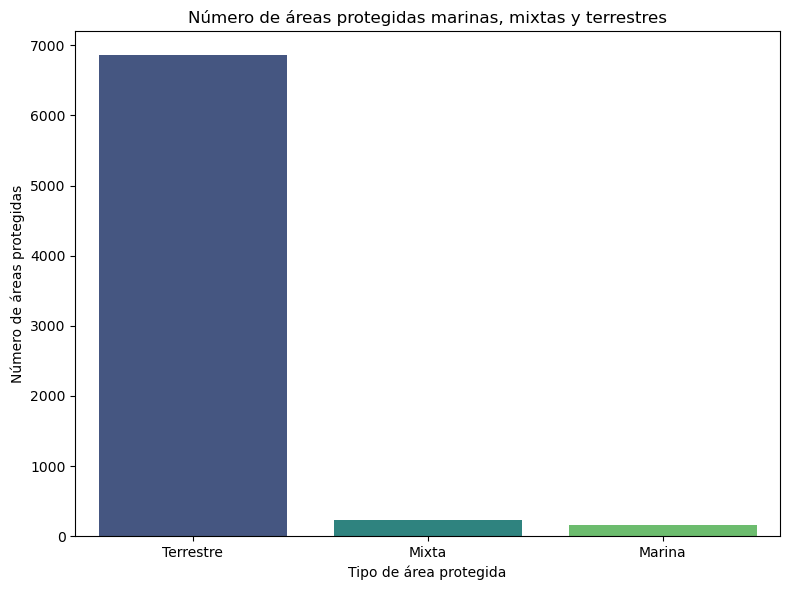

In [ ]:

# Contar cuántas áreas protegidas corresponden a cada tipo (0 = Terrestre, 1 = Mixta, 2 = Marina)
areas_tipo = df_south_america['MARINE'].value_counts()

# Etiquetas para las categorías
etiquetas = ['Terrestre', 'Mixta', 'Marina']

# Crear un gráfico de barras para mostrar la cantidad de áreas marinas, mixtas y terrestres
plt.figure(figsize=(8, 6))
sns.barplot(x=etiquetas, y=areas_tipo.values, palette='viridis')

# Agregar títulos y etiquetas
plt.title('Número de áreas protegidas marinas, mixtas y terrestres')
plt.xlabel('Tipo de área protegida')
plt.ylabel('Número de áreas protegidas')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

La gráfica muestra un predominio de áreas protegidas terrestres en comparación con las marinas y mixtas. Esto sugiere que las políticas de conservación se han centrado más en los ecosistemas terrestres. 
Quizá recomendaríamos un enfoque más equilibrado, con mayor atención y recursos dedicados a la protección de los ecosistemas marinos y mixtos para asegurar una conservación integral y sostenida de la biodiversidad global.

``Para poder crear en tableau todas las visualizaciones que queremos vamos a generar distintos data frame.``

In [ ]:
# dataframe con los continentes y sus porcentajes areas protegidas en cada uno


# Dictionary of continents and their percentages
data = {
    "continent": [
        "Africa",
        "Antarctica",
        "North America",
        "South America",
        "Asia",
        "Europe",
        "Oceania"
    ],
    "continent percentage": [
        17.1,
        0.0,
        20.6,
        23.4,
        15.8,
        25.6,
        16.0
    ]
}

# Create the DataFrame
df_continent = pd.DataFrame(data)

# Save it as a CSV file
df_continent.to_csv("continent_percentages.csv", index=False)

In [ ]:
# dataframe de los códigos y los nombres


# Diccionario con códigos y nombres de países (puedes pegar el que ya tienes aquí)
codigo_paises = {
    "RUS": "Rusia",
    "PHL": "Filipinas",
    "NZL": "Nueva Zelanda",
    "AIA": "Anguila",
    "BRA": "Brasil",
    "PER": "Perú",
    "ECU": "Ecuador",
    "VNM": "Vietnam",
    "GBR": "Reino Unido",
    "IDN": "Indonesia",
    "KAZ": "Kazajistán",
    "TUN": "Túnez",
    "BOL": "Bolivia",
    "UGA": "Uganda",
    "ARG": "Argentina",
    "MMR": "Myanmar",
    "ZMB": "Zambia",
    "MEX": "México",
    "UKR": "Ucrania",
    "TUV": "Tuvalu",
    "DEU": "Alemania",
    "IRL": "Irlanda",
    "GIN": "Guinea",
    "ITA": "Italia",
    "KEN": "Kenia",
    "KGZ": "Kirguistán",
    "TTO": "Trinidad y Tobago",
    "EST": "Estonia",
    "BLR": "Bielorrusia",
    "IRN": "Irán",
    "GRC": "Grecia",
    "SXM": "Sint Maarten",
    "EGY": "Egipto",
    "DNK": "Dinamarca",
    "ESP": "España",
    "SEN": "Senegal",
    "TKM": "Turkmenistán",
    "CAN": "Canadá",
    "BEL": "Bélgica",
    "GRL": "Groenlandia",
    "FJI": "Fiyi",
    "BHS": "Bahamas",
    "BEN": "Benín",
    "BIH": "Bosnia y Herzegovina",
    "FIN": "Finlandia",
    "BRB": "Barbados",
    "BRN": "Baréin",
    "ABW": "Aruba",
    "ALA": "Islas Åland",
    "ALB": "Albania",
    "AND": "Andorra",
    "AUT": "Austria",
    "ATF": "Territorios Australes Franceses",
    "FRA": "Francia",
    "BGR": "Bulgaria",
    "BES": "Bonaire, San Eustaquio y Saba",
    "CYM": "Islas Caimán",
    "BGD": "Bangladés",
    "BLM": "San Bartolomé",
    "GLP": "Guadalupe",
    "MAF": "San Martín",
    "MTQ": "Martinica",
    "DOM": "República Dominicana",
    "BWA": "Botsuana",
    "CZE": "Chequia",
    "DJI": "Yibuti",
    "DMA": "Dominica",
    "CHE": "Suiza",
    "CUW": "Curazao",
    "COM": "Comoras",
    "CYP": "Chipre",
    "FLK": "Islas Malvinas",
    "FRO": "Islas Feroe",
    "HUN": "Hungría",
    "ISL": "Islandia",
    "NLD": "Países Bajos",
    "PRT": "Portugal",
    "SWE": "Suecia",
    "IND": "India",
    "GHA": "Ghana",
    "NOR": "Noruega",
    "GGY": "Guernsey",
    "HTI": "Haití",
    "TWN": "Taiwán",
    "GUF": "Guayana Francesa",
    "HKG": "Hong Kong",
    "HRV": "Croacia",
    "HND": "Honduras",
    "LKA": "Sri Lanka",
    "CHN": "China",
    "IRQ": "Irak",
    "ISR": "Israel",
    "JAM": "Jamaica",
    "KIR": "Kiribati",
    "LBN": "Líbano",
    "LBR": "Liberia",
    "LCA": "Santa Lucía",
    "NPL": "Nepal",
    "NIC": "Nicaragua",
    "LIE": "Liechtenstein",
    "SHN": "Santa Elena",
    "SJM": "Svalbard y Jan Mayen",
    "VUT": "Vanuatu",
    "SSD": "Sudán del Sur",
    "POL": "Polonia",
    "LTU": "Lituania",
    "LVA": "Letonia",
    "MCO": "Mónaco",
    "MHL": "Islas Marshall",
    "MNG": "Mongolia",
    "MKD": "Macedonia del Norte",
    "MWI": "Malaui",
    "MNE": "Montenegro",
    "MRT": "Mauritania",
    "MSR": "Montserrat",
    "MYT": "Mayotte",
    "ROU": "Rumanía",
    "SDN": "Sudán",
    "SGP": "Singapur",
    "TCA": "Islas Turcas y Caicos",
    "SUR": "Surinam",
    "SVK": "Eslovaquia",
    "TJK": "Tayikistán",
    "SVN": "Eslovenia",
    "TON": "Tonga",
    "TUR": "Turquía",
    "TLS": "Timor Oriental",
    "SLB": "Islas Salomón",
    "KHM": "Camboya",
    "VGB": "Islas Vírgenes Británicas",
    "USA": "Estados Unidos",
    "VCT": "San Vicente y las Granadinas",
    "VIR": "Islas Vírgenes de los Estados Unidos",
    "COK": "Islas Cook",
    "JEY": "Jersey",
    "GTM": "Guatemala",
    "COL": "Colombia",
    "MOZ": "Mozambique",
    "AFG": "Afganistán",
    "COG": "República del Congo",
    "RWA": "Ruanda",
    "NCL": "Nueva Caledonia",
    "VEN": "Venezuela",
    "KNA": "San Cristóbal y Nieves",
    "PLW": "Palaos",
    "SGS": "Islas Georgias del Sur y Sandwich del Sur",
    "CRI": "Costa Rica",
    "WSM": "Samoa",
    "KWT": "Kuwait",
    "CUB": "Cuba",
    "PNG": "Papúa Nueva Guinea",
    "NIU": "Niue",
    "AZE": "Azerbaiyán",
    "URY": "Uruguay",
    "TZA": "Tanzania",
    "DZA": "Argelia",
    "BDI": "Burundi",
    "CAF": "República Centroafricana",
    "COD": "República Democrática del Congo",
    "GAB": "Gabón",
    "GUY": "Guyana",
    "PRY": "Paraguay",
    "CHL": "Chile"
}

# Reemplazar las siglas por nombres usando el diccionario
df_nombres['NAME'] = df_nombres['ISO3'].map(codigo_paises)


# Selecciona solo las columnas necesarias
df_nombres = df_nombres[['NAME','ISO3']]

# Exporta a CSV
df_nombres.to_csv('nombres_paises.csv', index=False)

print("✅ Archivo 'nombres_paises.csv' creado con éxito.")

In [ ]:
df_nombres = pd.DataFrame(codigo_paises, index=range(len(codigo_paises))).iloc[0,:].reset_index()
df.columns = ['COD', 'NAME']

# Exporta a CSV
df_nombres.to_csv('nombres_paises.csv', index=False)

print("✅ Archivo 'nombres_paises.csv' creado con éxito.")

In [ ]:
# dataframe de las coordenadas

# Inicializar geolocalizador
geolocator = Nominatim(user_agent="geoapi")

# Lista de países con sus códigos ISO3
iso_codes = [
    'RUS', 'PHL', 'NZL', 'AIA', 'BRA', 'PER', 'ECU', 'VNM', 'GBR', 'IDN', 'KAZ', 'TUN',
    'BOL', 'UGA', 'ARG', 'MMR', 'ZMB', 'MEX', 'UKR', 'TUV', 'DEU', 'IRL', 'GIN', 'ITA',
    'KEN', 'KGZ', 'TTO', 'EST', 'BLR', 'IRN', 'GRC', 'SXM', 'EGY', 'DNK', 'ESP', 'SEN',
    'TKM', 'CAN', 'BEL', 'GRL', 'FJI', 'BHS', 'BEN', 'BIH', 'FIN', 'BRB', 'BRN', 'ABW',
    'ALA', 'ALB', 'AND', 'AUT', 'ATF', 'FRA', 'BGR', 'BES', 'CYM', 'BGD', 'BLM;GLP;MAF;MTQ', 
    'DOM', 'BWA', 'CZE', 'DJI', 'DMA', 'CHE', 'CUW', 'COM', 'CYP', 'FLK', 'FRA;ITA;MCO', 
    'FRO', 'HUN', 'ISL', 'NLD', 'PRT', 'SWE', 'IND', 'GHA', 'NOR', 'GGY', 'HTI', 'TWN', 
    'GLP', 'GUF', 'HKG', 'HRV', 'HND', 'LKA', 'CHN', 'IRQ', 'ISR', 'JAM', 'KIR', 'LBN', 
    'LBR', 'LCA', 'NPL', 'NIC', 'LIE', 'SHN', 'SJM', 'VUT', 'SSD', 'POL', 'LTU', 'LVA',
    'MAF', 'MCO', 'MHL', 'MNG', 'MKD', 'MWI', 'MNE', 'MRT', 'MSR', 'MTQ', 'MYT', 'ROU', 
    'SDN', 'SGP', 'TCA', 'SUR', 'SVK', 'TJK', 'SVN', 'TON', 'TUR', 'TLS', 'SLB', 'KHM', 
    'VGB', 'USA', 'VCT', 'VIR', 'COK', 'JEY', 'GTM', 'COL', 'MOZ', 'AFG', 'COG', 'RWA', 
    'NCL', 'VEN', 'KNA', 'PLW', 'SGS', 'CRI', 'WSM', 'KWT', 'CUB', 'PNG', 'NIU', 'AZE', 
    'URY', 'TZA', 'DZA', 'BDI', 'CAF', 'COD', 'GAB', 'GNQ', 'TCD', 'STP', 'ARE', 'MLT', 
    'NER', 'BFA;NER;BEN', 'SWZ', 'GUY', 'GNB', 'MLI', 'SYC', 'SLV', 'QAT', 'GRD', 'TGO', 
    'BFA', 'CMR', 'MYS', 'THA', 'ATG', 'ARM', 'AGO', 'ASM', 'PRI', 'ZWE', 'ETH', 'SLE', 
    'PCN', 'ERI', 'JPN', 'ABNJ', 'PAN', 'BHR', 'LAO', 'UZB', 'PSE', 'UMI', 'MNP', 'GUM', 
    'MNP;GUM', 'NGA', 'IMN', 'MAR', 'OMN', 'NAM', 'KOR', 'BMU', 'MNP;UMI', 'JOR', 'MAR;ESP', 
    'SRB', 'CPV', 'MDA', 'GIB', 'GEO', 'LUX', 'MUS', 'AUS', 'YEM', 'CIV', 'ATA', 'CXR', 
    'MKD;ALB', 'MDG', 'AZE;IRN', 'COG;CMR;CAF', 'KAZ;TKM;UZB', 'DEU;SVK;ALB;AUT;BEL;BGR;ESP;HRV;ITA;ROU;SVN;UKR',
    'BLR;POL', 'CRI;PAN', 'ZMB;ZWE', 'CHE;ITA', 'CAN;USA', 'SVK;HUN', 'FRA;ESP', 'MNG;RUS',
    'REU', 'NLD;DEU;DNK', 'UZB;KGZ;KAZ', 'FIN;SWE', 'CIV;GIN', 'CCK', 'HMD', 'NFK', 'CHL', 
    'BVT', 'BLM', 'SPM', 'ZAF', 'SAU', 'PAK', 'GMB', 'BLZ', 'MDV', 'PRY', 'BTN', 'LSO', 
    'LSO;ZAF', 'SYR', 'PYF', 'PRK', 'WLF', 'FSM', 'TKL', 'PRT;ESP', 'TGO;BEN', 'LBY', 'SOM'
]

# Crear un diccionario vacío para almacenar las coordenadas
iso_coords = {}

# Obtener las coordenadas para cada país
for iso in iso_codes:
    try:
        # Si el código ISO tiene múltiples países, toma el primero
        first_iso = iso.split(';')[0]
        
        # Buscar país por código ISO
        country = pycountry.countries.get(alpha_3=first_iso)
        if country:
            location = geolocator.geocode(country.name)
            if location:
                iso_coords[iso] = (location.latitude, location.longitude)
            else:
                iso_coords[iso] = (None, None)
        else:
            iso_coords[iso] = (None, None)
        
        sleep(1)  # Evitar ser bloqueado por Nominatim
    except Exception as e:
        print(f"Error con {iso}: {e}")
        iso_coords[iso] = (None, None)

# Convertir los resultados a un DataFrame
df = pd.DataFrame(list(iso_coords.items()), columns=['ISO3', 'Coordinates'])
df['Latitude'] = df['Coordinates'].apply(lambda x: x[0] if x else None)
df['Longitude'] = df['Coordinates'].apply(lambda x: x[1] if x else None)
df.drop('Coordinates', axis=1, inplace=True)

# Guardar los resultados en un archivo CSV
df.to_csv("paises_con_coordenadas.csv", index=False)

print("✅ El archivo 'paises_con_coordenadas.csv' se ha generado con éxito.")